In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import glob
import time

(3500, 4400, 3)

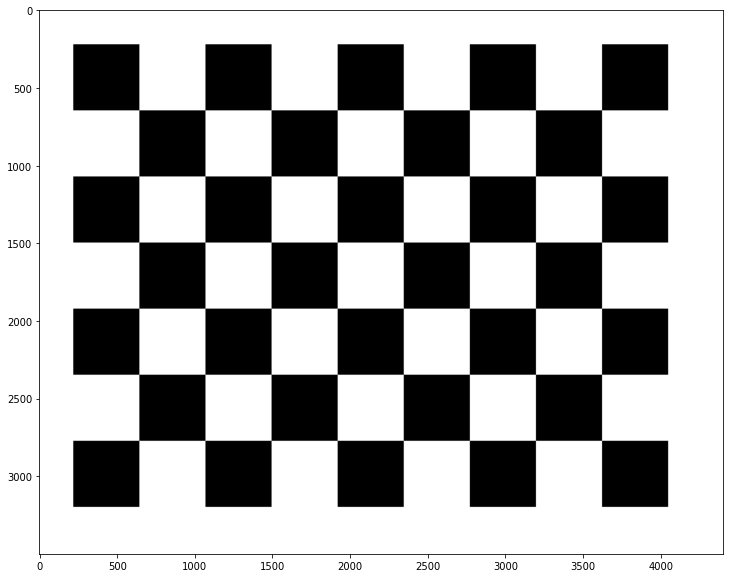

In [2]:
img = cv2.imread('chess.png')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

plt.figure(figsize=(20,10))
plt.imshow(gray, cmap='gray');
img.shape

time taken for the 6 images =  0.30440735816955566  s


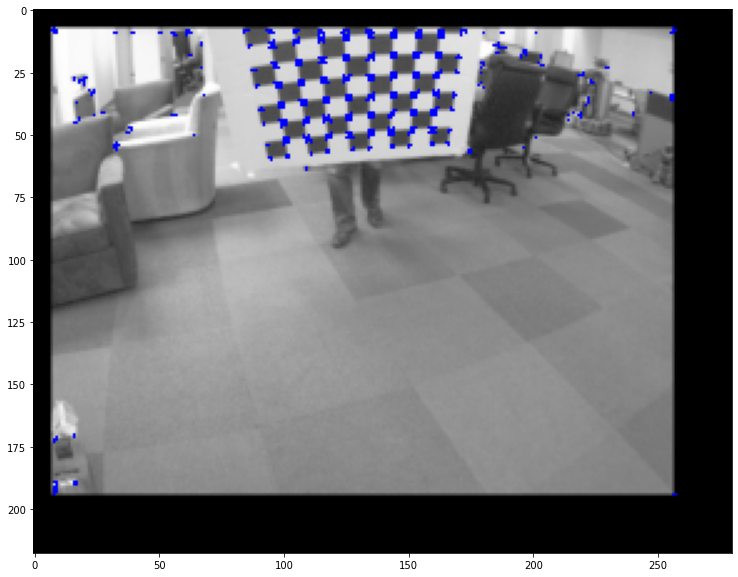

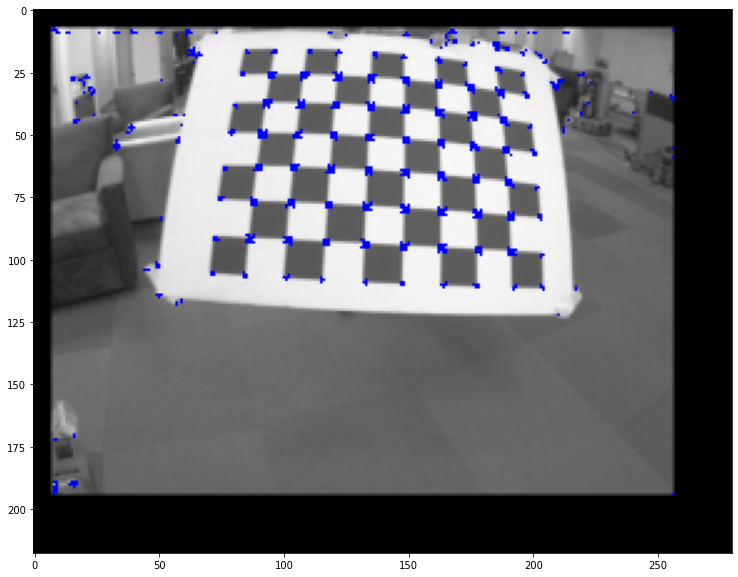

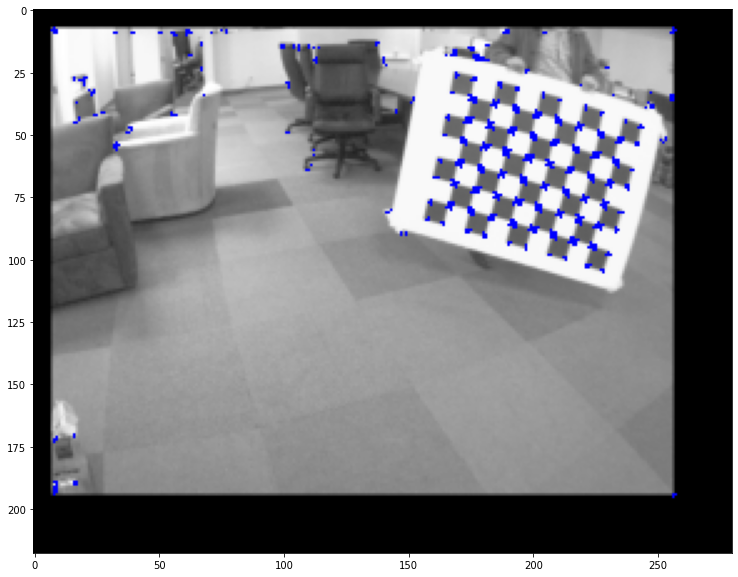

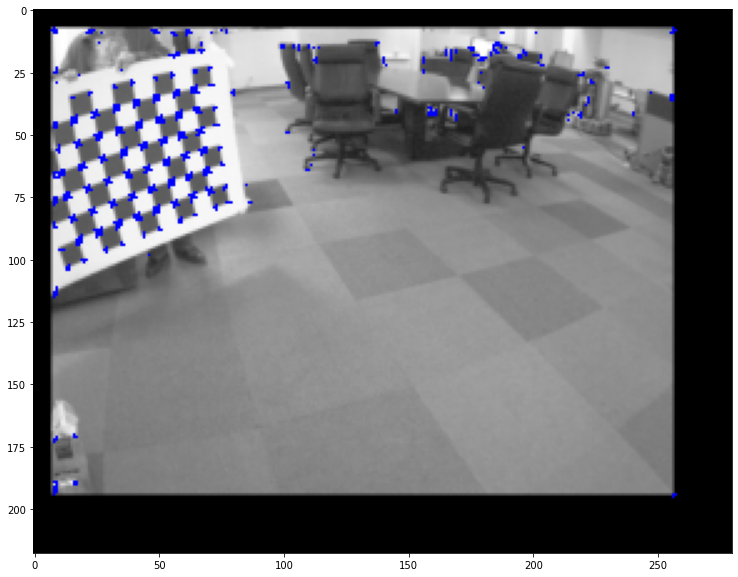

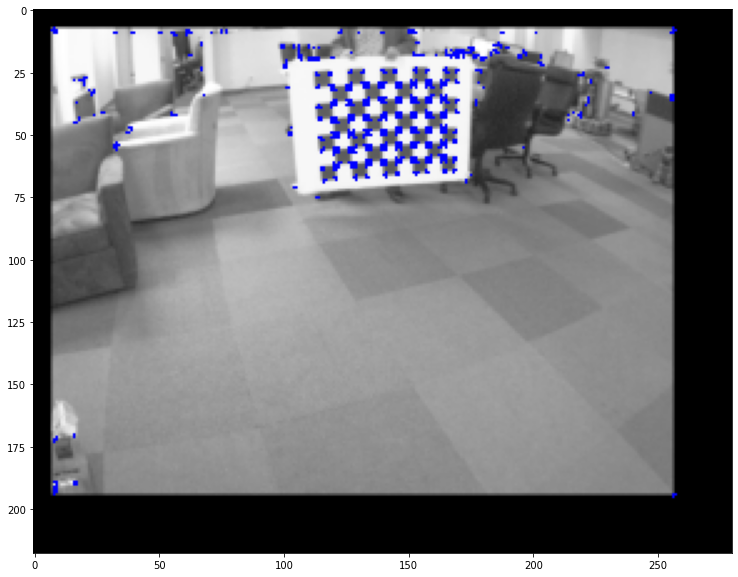

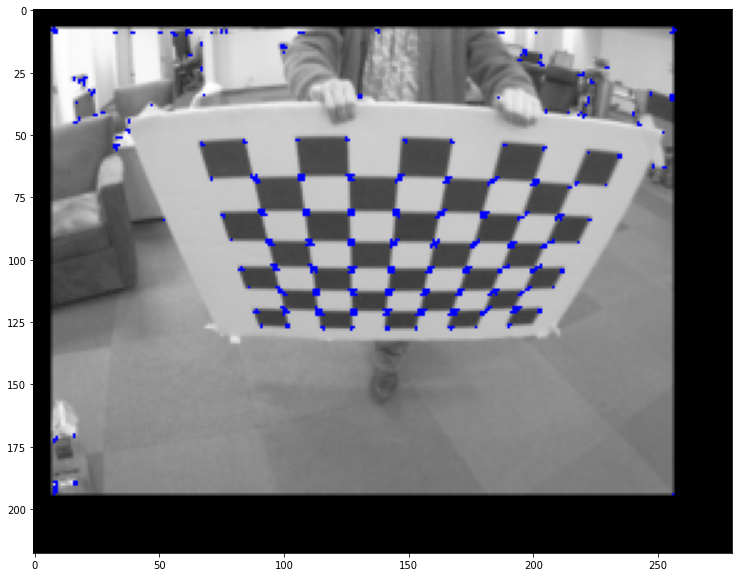

In [62]:
tic=time.time()
count=1
for image in glob.glob('00*'):
    img = cv2.imread(image)
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    gray = np.float32(gray)
    dst = cv2.cornerHarris(gray,2,3,0.04)
    img[dst>.01*dst.max()]=[0,0,255]
    plt.figure(figsize=(20,10))
    plt.imshow(img, cmap='gray');
    plt.imsave("out00{}.png".format(count),img)
    count+=1

print("time taken for the 6 images = ", time.time()-tic," s")

time taken for chess image =  0.2468578815460205  s


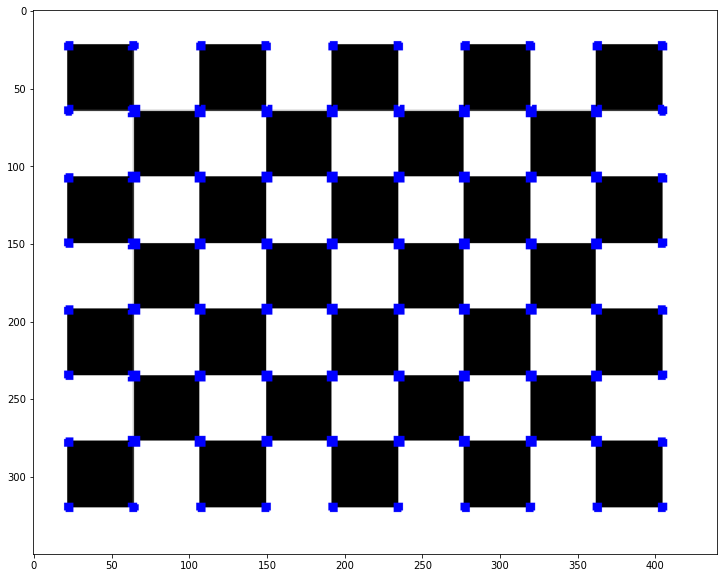

In [4]:
tic=time.time()

imgs = cv2.imread("chess.png")
img = cv2.resize(imgs, (440,350), interpolation = cv2.INTER_LINEAR)
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray = np.float32(gray)
dst = cv2.cornerHarris(gray,4,5,0.04)
dst = cv2.dilate(dst,None)
img[dst>0.04*dst.max()]=[0,0,255]
plt.figure(figsize=(20,10))
plt.imshow(img, cmap='gray');
plt.imsave("chessout.png",img)

print("time taken for chess image = ", time.time()-tic," s")

In [3]:
def nothing(x):
    pass

cv2.namedWindow('Output')

cv2.createTrackbar('blockSize', 'Output', 4,100, nothing)
cv2.createTrackbar('ksize', 'Output', 4,100, nothing)
cv2.createTrackbar('k', 'Output', 4, 100, nothing)
cv2.createTrackbar('th', 'Output', 4, 100, nothing)

imgs = cv2.imread("chess.png")
img = cv2.resize(imgs, (440,350), interpolation = cv2.INTER_LINEAR)


while 1:
    out = img.copy()
    gray = cv2.cvtColor(out,cv2.COLOR_BGR2GRAY)
    gray = np.float32(gray)

    blockSize = cv2.getTrackbarPos('blockSize', 'Output')
    ksize = cv2.getTrackbarPos('ksize', 'Output')
    k = cv2.getTrackbarPos('k', 'Output')
    th = cv2.getTrackbarPos('th', 'Output')
    if(ksize%2==0):
        ksize+=1
    dst = cv2.cornerHarris(gray,blockSize,ksize,k/100)
    dst = cv2.dilate(dst,None)

    out[dst>(th/100)*dst.max()]=[255,0,0]

    cv2.imshow('Output',out);
    k = cv2.waitKey(1)
    if k == 27:
        plt.imsave("chessout.png",out)
        break

cv2.destroyAllWindows()